* Combined ST
* Combined CB

In [1]:
import pandas as pd

data = pd.read_csv('fifa.csv')
data
unique_values = data['Position'].unique()
print(unique_values)
print(len(unique_values))

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB' nan]
28


#### Saving Seperate CSV according to positions

In [2]:
# Position_File = data[(data['Position'] == 'LB') | (data['Position'] == 'LWB')]
# Position_File
# Position_File.to_csv('LM_position.csv', index=False)

#### FEATURE NAMES

In [3]:
print(data.head(10))

       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   
6  177003          L. Modrić   32     Croatia       91         91   
7  176580          L. Suárez   31     Uruguay       91         91   
8  155862       Sergio Ramos   32       Spain       91         91   
9  200389           J. Oblak   25    Slovenia       90         93   

                  Club    Value   Wage Preferred Foot  ...  Composure  \
0         FC Barcelona  €110.5M  €565K           Left  ...       96.0   
1             Juventus     €77M  €405K          Right  ...       95.0   
2  Paris Saint-Germai

#### FIltering 

In [4]:
Position_File = data[(data['Position'] == 'GK') ]
Position_File=Position_File[['Name','Age','Position','Value','Wage','Body Type', 'Height', 'Weight','Potential', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Reactions', 'Balance', 'Jumping', 'Agility', 'Strength','Stamina','Acceleration','BallControl']]
Position_File

,Name,Age,Position,Value,Wage,Body Type,Height,Weight,Potential,GKDiving,...,GKPositioning,GKReflexes,Reactions,Balance,Jumping,Agility,Strength,Stamina,Acceleration,BallControl
3,De Gea,27,GK,€72M,€260K,Lean,6'4,168lbs,93,90.0,...,88.0,94.0,90.0,43.0,67.0,60.0,64.0,43.0,57.0,42.0
9,J. Oblak,25,GK,€68M,€94K,Normal,6'2,192lbs,93,86.0,...,88.0,89.0,86.0,49.0,76.0,67.0,78.0,41.0,43.0,16.0
18,M. ter Stegen,26,GK,€58M,€240K,Normal,6'2,187lbs,92,87.0,...,85.0,90.0,85.0,43.0,79.0,37.0,79.0,35.0,38.0,18.0
19,T. Courtois,26,GK,€53.5M,€240K,Courtois,6'6,212lbs,90,85.0,...,86.0,88.0,84.0,45.0,68.0,61.0,70.0,38.0,46.0,23.0
22,M. Neuer,32,GK,€38M,€130K,Normal,6'4,203lbs,89,90.0,...,87.0,87.0,84.0,35.0,77.0,51.0,80.0,43.0,54.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,L. Wahlstedt,18,GK,€50K,€1K,Lean,6'0,176lbs,65,47.0,...,45.0,51.0,40.0,29.0,48.0,33.0,38.0,20.0,24.0,12.0
18180,M. Hurst,22,GK,€40K,€1K,Lean,6'1,172lbs,58,45.0,...,50.0,45.0,47.0,52.0,55.0,45.0,58.0,33.0,40.0,25.0
18183,K. Pilkington,44,GK,€0,€1K,Normal,6'2,190lbs,48,45.0,...,49.0,46.0,48.0,31.0,45.0,31.0,44.0,22.0,15.0,16.0
18194,J. Milli,18,GK,€50K,€1K,Normal,6'3,187lbs,65,52.0,...,40.0,44.0,37.0,22.0,33.0,39.0,59.0,15.0,20.0,17.0


In [5]:

from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
Position_File['Body Type'] = label_encoder.fit_transform(Position_File['Body Type'])

# Function to remove commas and convert to number
def remove_commas_and_convert(val):
    try:
        # Remove commas
        val = val.replace('€', '')
        val = val.replace('K', '')
        val = val.replace('M', '')
        # Convert to float (can handle both integers and floats)
        return float(val)
    except ValueError:
        # Return NaN or some indicator for non-numeric values
        return None

# Apply the function to the desired column
Position_File['Wage'] = Position_File['Wage'].apply(remove_commas_and_convert)
Position_File['Value'] = Position_File['Value'].apply(remove_commas_and_convert)
def remove_lbs(val):
    try:
        # Remove commas
        val = val.replace('lbs', '')
        # Convert to float (can handle both integers and floats)
        return float(val)
    except ValueError:
        # Return NaN or some indicator for non-numeric values
        return None

# Apply the function to the desired column
Position_File['Weight'] = Position_File['Weight'].apply(remove_lbs)


def convert_heightinto_cms(val):
    try:
        # Remove commas
        feet, inches = val.split("'")

        # Convert feet and inches to integers
        feet = int(feet)
        inches = int(inches)

        # Calculate the total number of inches
        total_inches = feet * 12 + inches

        # Convert to float (can handle both integers and floats)
        return float(total_inches)
    except ValueError:
        # Return NaN or some indicator for non-numeric values
        return None

# Apply the function to the desired column
Position_File['Height'] = Position_File['Height'].apply(convert_heightinto_cms)

Position_File.head(5)

,Name,Age,Position,Value,Wage,Body Type,Height,Weight,Potential,GKDiving,...,GKPositioning,GKReflexes,Reactions,Balance,Jumping,Agility,Strength,Stamina,Acceleration,BallControl
3,De Gea,27,GK,72.0,260.0,1,76.0,168.0,93,90.0,...,88.0,94.0,90.0,43.0,67.0,60.0,64.0,43.0,57.0,42.0
9,J. Oblak,25,GK,68.0,94.0,2,74.0,192.0,93,86.0,...,88.0,89.0,86.0,49.0,76.0,67.0,78.0,41.0,43.0,16.0
18,M. ter Stegen,26,GK,58.0,240.0,2,74.0,187.0,92,87.0,...,85.0,90.0,85.0,43.0,79.0,37.0,79.0,35.0,38.0,18.0
19,T. Courtois,26,GK,53.5,240.0,0,78.0,212.0,90,85.0,...,86.0,88.0,84.0,45.0,68.0,61.0,70.0,38.0,46.0,23.0
22,M. Neuer,32,GK,38.0,130.0,2,76.0,203.0,89,90.0,...,87.0,87.0,84.0,35.0,77.0,51.0,80.0,43.0,54.0,48.0


In [6]:
Position_File.drop(columns=['Name','Position']).corr()['Wage'].sort_values(ascending=False)

Wage             1.000000
GKHandling       0.541656
GKDiving         0.527013
GKReflexes       0.524599
Potential        0.504795
GKPositioning    0.499357
Reactions        0.459734
GKKicking        0.444909
Jumping          0.247977
Acceleration     0.240823
Agility          0.229092
BallControl      0.212937
Stamina          0.189361
Strength         0.173020
Age              0.165066
Weight           0.131853
Height           0.112497
Balance          0.068881
Body Type       -0.042877
Value           -0.174983
Name: Wage, dtype: float64

In [7]:
Position_File['ShotStoppingAbility'] = (
    Position_File['GKReflexes']  +
    Position_File['GKDiving']  +
    Position_File['GKHandling'] +
    Position_File['GKPositioning']  +
    Position_File['GKKicking'] 
)
Position_File['PhysicalStrength'] = (
    Position_File['Strength'] +
    Position_File['Agility']  +
    Position_File['Balance'] +
    Position_File['Acceleration'] +
    Position_File['Stamina'] +
    Position_File['Jumping'] 
)

Position_File[['Wage','Potential','Value']].corr()['Potential']




Wage         0.504795
Potential    1.000000
Value        0.000530
Name: Potential, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# x=['GKDiving',	'GKHandling',	'GKKicking',	'GKPositioning',	'GKReflexes',	'Reactions',	'Balance',	'Jumping',	'Agility',	'Strength',	'Stamina',	'Acceleration',	'BallControl','Height',	'Weight','Value','Age']
x=['ShotStoppingAbility','PhysicalStrength','Reactions','BallControl','Height','Weight','Value']
y=['Potential']

x_train, x_test, y_train, y_test = train_test_split(Position_File[x],Position_File[y],test_size=0.3, random_state=42)

Ridge_model = Ridge()
Ridge_model.fit(x_train,y_train)

pred_ridge_y_test= Ridge_model.predict(x_test)
pred_ridge_y_train= Ridge_model.predict(x_train)

pred_ridge_y_test = np.array(pred_ridge_y_test).flatten().tolist()
pred_ridge_y_train = np.array(pred_ridge_y_train).flatten().tolist()

print(f'Test - {r2_score(y_test,pred_ridge_y_test)}')
print(f'Train - {r2_score(y_train,pred_ridge_y_train)}')

Test - 0.5559845787690001
Train - 0.5470039098979096


In [9]:
# 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None
RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(x_train,y_train)

pred_RandomForest_y_test=RandomForest_model.predict(x_test)
pred_RandomForest_y_train=RandomForest_model.predict(x_train)

print(f'Test - {r2_score(y_test,pred_RandomForest_y_test)}')
print(f'Train - {r2_score(y_train,pred_RandomForest_y_train)}')


C:\Users\dhira\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test - 0.87791335884836
Train - 0.9829756898115343


<!-- Regression Models: If predicting a continuous performance metric (e.g., predicted score), use models like Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor.
Classification Models: If categorizing goalkeepers into performance tiers (e.g., top performers vs. average performers), use models like Logistic Regression, Random Forest Classifier, or Support Vector Machines (SVM). -->

In [10]:
import xgboost as xgb

XGboost_model = xgb.XGBRegressor(objective ='reg:squarederror')
XGboost_model.fit(x_train, y_train)

pred_XGboost_y_test=XGboost_model.predict(x_test)
pred_XGboost_y_train=XGboost_model.predict(x_train)

print(f'XGBoost Test - {r2_score(y_test,pred_XGboost_y_test)}')
print(f'XGBoost Train - {r2_score(y_train,pred_XGboost_y_train)}')




XGBoost Test - 0.8759052157402039
XGBoost Train - 0.9972731471061707


#### HYBRID MODEL

In [11]:
combine_test =((pred_XGboost_y_test+pred_RandomForest_y_test)/2)
combine_train= (pred_XGboost_y_train+pred_RandomForest_y_train)/2

print(f'Test - {r2_score(y_test,combine_test)}')
print(f'Train - {r2_score(y_train,combine_train)}')

Test - 0.8846030855177618
Train - 0.9930224048951666


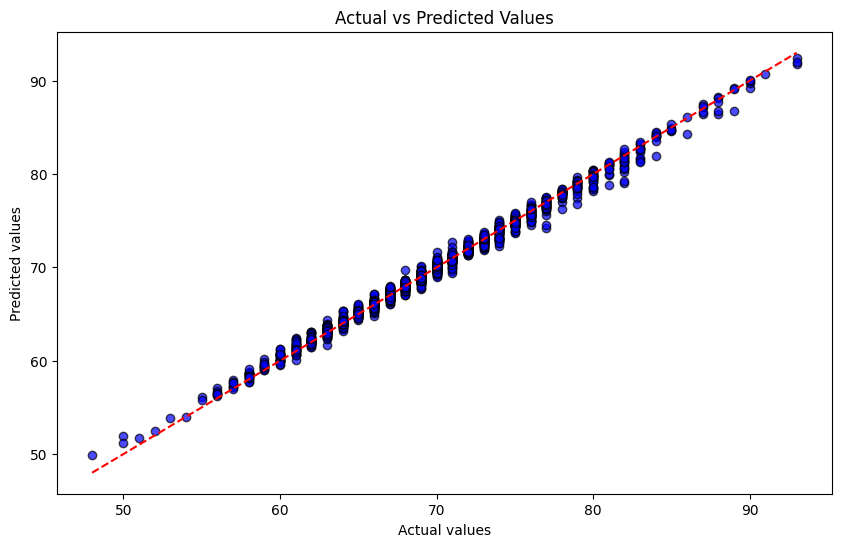

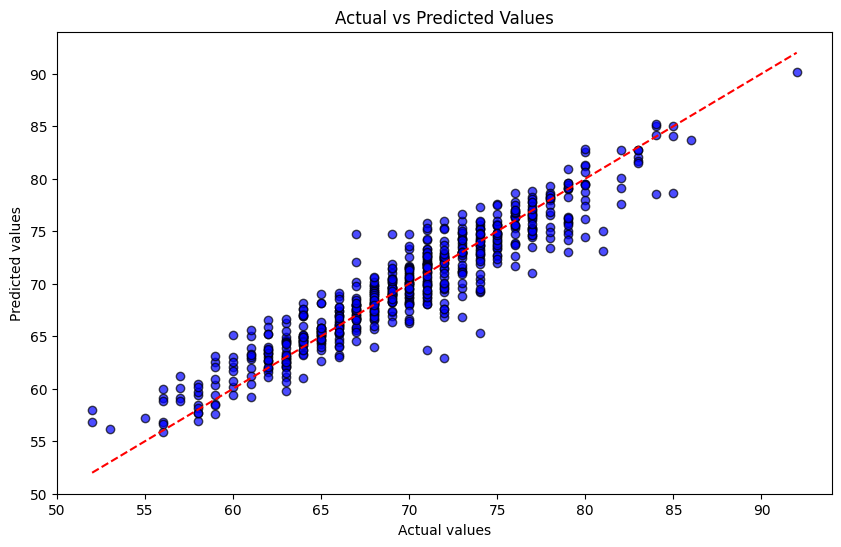

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, combine_train, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, combine_test, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
import numpy as np

importances = model.feature_importances_
x=Position_File[x]

indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), np.array(features)[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

NameError: name 'model' is not defined

## Model

* Regression Models: If predicting a continuous performance metric (e.g., predicted score), use models like Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor.
Classification Models: If categorizing goalkeepers into performance tiers (e.g., top performers vs. average performers), use models like Logistic Regression, Random Forest Classifier, or Support Vector Machines (SVM).

<!-- Regression Models: If predicting a continuous performance metric (e.g., predicted score), use models like Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor.
Classification Models: If categorizing goalkeepers into performance tiers (e.g., top performers vs. average performers), use models like Logistic Regression, Random Forest Classifier, or Support Vector Machines (SVM). -->